/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving Train.csv to Train.csv


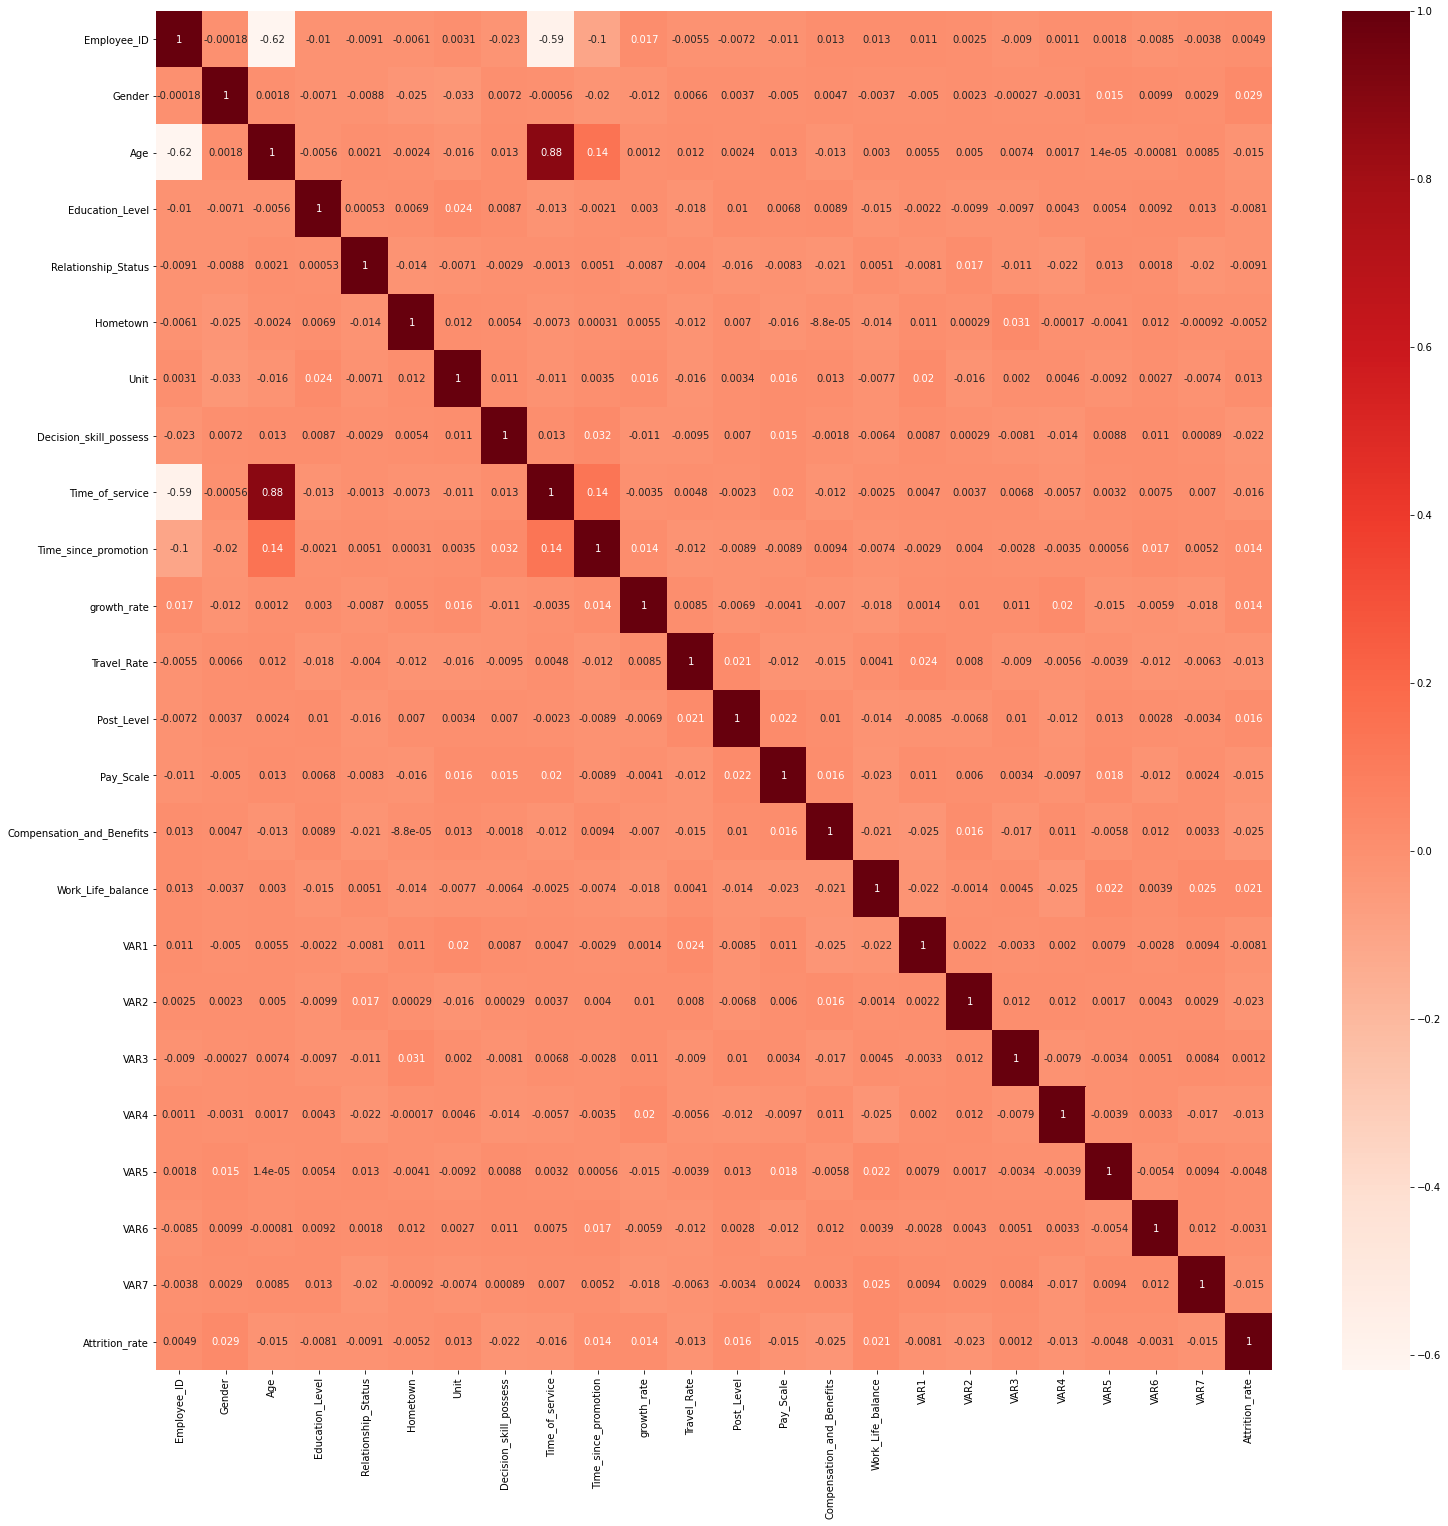

Saving Test.csv to Test.csv
[13:44:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is n

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Coded by Niket Ganatra (Github: @dev-niket  github.com/dev-niket)

#Source code for the ML Challenge conducted on HackerRank during June-July, 2020.

#Some of the libraries and functions only function on Google Colab.
#You can replace them with other appropriate equivalents according to the tool/environment you use.

#You can find the problem statement as well as the training and testing Dataset in the repository

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import files
uploaded = files.upload()

import io
train = pd.read_csv(io.BytesIO(uploaded['Train.csv']));


cleanup_g = {"Gender":{"M": 1, "F": 0}}
train.replace(cleanup_g, inplace=True)

cleanup_rs = {"Relationship_Status":{"Married": 1, "Single": 0}}
train.replace(cleanup_rs, inplace=True)

cleanup_h = {"Hometown":{"Franklin": 0, "Springfield": 1, "Clinton": 2, "Lebanon": 3, "Washington": 4}}
train.replace(cleanup_h, inplace=True)

cleanup_cb = {"Compensation_and_Benefits":{"type0": 0, "type1": 1, "type2": 2, "type3": 3, "type4": 4}}
train.replace(cleanup_cb, inplace=True)

cleanup_dsp = {"Decision_skill_possess":{"Conceptual": 0, "Analytical": 1, "Directive": 2, "Behavioral": 3}}
train.replace(cleanup_dsp, inplace=True)


cleanup_u = {"Unit":{"IT": 0, "Logistics": 1, "Sales": 2, "Operarions": 3, "R&D": 4, "Purchasing": 5, "Accounting and Finance": 6, "Human Resource Management": 7, "Marketing": 8, "Production": 9, "Quality": 10, "Security": 11}}
train.replace(cleanup_u, inplace=True)

train['Age'].fillna(train['Age'].mean(),inplace=True)
train['Time_of_service'].fillna(train['Time_of_service'].mean(),inplace=True)
train['Pay_Scale'].fillna(train['Pay_Scale'].mean(),inplace=True)
train['Work_Life_balance'].fillna(train['Work_Life_balance'].mean(),inplace=True)
train['VAR2'].fillna(train['VAR2'].mean(),inplace=True)
train['VAR4'].fillna(train['VAR4'].mean(),inplace=True)


train['Employee_ID'] = train['Employee_ID'].str.slice(4)
train['Employee_ID'] = train['Employee_ID'].astype(int)
plt.figure(figsize=(25,25))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

train = train.drop(['Employee_ID','Age','VAR3','VAR5','VAR6'],axis=1)

x_train = train.drop(['Attrition_rate'],axis=1)

y_train = train['Attrition_rate']

x_train_v = x_train.values

y_train_l = y_train.tolist()

uploaded2 = files.upload()

import io
test = pd.read_csv(io.BytesIO(uploaded2['Test.csv']));


test.replace(cleanup_g, inplace=True)
test.replace(cleanup_rs, inplace=True)
test.replace(cleanup_h, inplace=True)
test.replace(cleanup_cb, inplace=True)
test.replace(cleanup_dsp, inplace=True)
test.replace(cleanup_u, inplace=True)


test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Time_of_service'].fillna(test['Time_of_service'].mean(),inplace=True)
test['Pay_Scale'].fillna(test['Pay_Scale'].mean(),inplace=True)
test['Work_Life_balance'].fillna(test['Work_Life_balance'].mean(),inplace=True)
test['VAR2'].fillna(test['VAR2'].mean(),inplace=True)
test['VAR4'].fillna(test['VAR4'].mean(),inplace=True)

x_test = test.drop(['Employee_ID','Age','VAR3','VAR5','VAR6'],axis=1)
x_test_v = x_test.values

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_v = sc.fit_transform(x_train_v)
x_test_v = sc.transform(x_test_v)

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
import xgboost as xgb

layer0 = list()
layer0.append(('knn', KNeighborsRegressor()))
layer0.append(('dt', DecisionTreeRegressor()))
layer0.append(('xgb',xgb.XGBRegressor()))

layer0.append(('svr', SVR()))
layer0.append(('rf',RandomForestRegressor(n_estimators=1000, random_state=26)))

meta = Ridge()

model = StackingRegressor(estimators=layer0, final_estimator=meta, cv=10)

model.fit(x_train_v, y_train_l)
y_pred_s = model.predict(x_test_v)
ops = pd.DataFrame(data=y_pred_s, columns=['Attrition_rate'])
ops.insert(0,'Employee_ID',(test['Employee_ID']).tolist())
ops.to_csv('HE_S12.csv',index=False) 
files.download('HE_S12.csv')